# Лабораторная 5. Частотная фильтрация

## Частотная фильтрация.

Для частотной фильтрации использовать БПФ (средствами OpenCV)

Показать пошаговое применение частотных сглаживающих и повышающих резкость фильтров:

Показать в сравнении идеальный фильтр, Батерворта и гауссиан

### Что нужно показывать!!!

- Исходное изображение.
- Спектр изображения
- Частотный фильтр для сглаживания
- Результат наложения в виде спектра и в виде изображения
- Частотный фильтр для повышения резкости
- Результат наложения в виде спектра и в виде изображения

In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [33]:
def showImage(images, size = 35, colorMap = 'gray'):
    countImages = len(images)
    #size *= countImages
    pic_box = plt.figure(figsize=(size, size * 5))
    for i, image in enumerate(images):
        pic_box.add_subplot(countImages, 2, i+1)
        plt.imshow(image)
        plt.set_cmap(colorMap)
        plt.subplots_adjust(wspace=0, hspace=0.0)
        plt.axis('off')
    plt.show()

# Читаем изображение

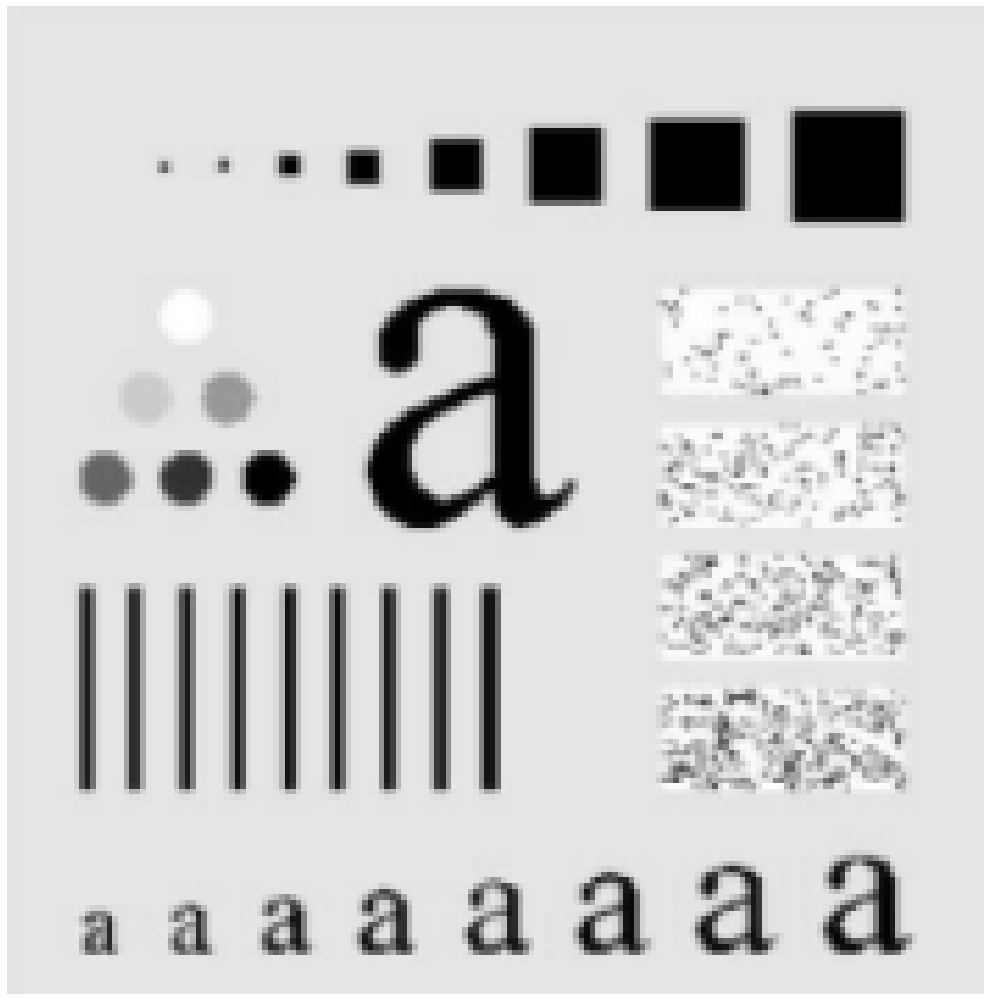

In [34]:
imageSrs = cv2.imread("1.png")
gray = cv2.cvtColor(imageSrs, cv2.COLOR_RGB2GRAY)
showImage([gray])

In [35]:
def get_spectr(image):
    f = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shift  =  np.fft.fftshift(f)
    f_complex  = f_shift[:,:,0]  +  1j*f_shift[:,:,1]
    f_abs = np.abs(f_complex)  + 1 # lie between 1 and  le6
    f_bounded = 20 * np.log(f_abs)  # dB
    f_img = 255  * f_bounded  / np.max(f_bounded)
    return f_img.astype(np.uint8)

In [36]:
def transform_by_Butterworth(image, d0, n):
    
    height, width = image.shape
    P, Q = height * 2, width * 2
    fp = np.zeros((P, Q), dtype='float')
    for i in range(height):
        for j in range(width):
            fp[i, j] = float(image[i, j]) * (-1) ** (j + i)
            #print(float(gray[i, j]) * (-1) ** (i + j))
    F1 = np.fft.fft2(fp)
    Bw = np.zeros((P, Q), dtype=float)
    
    a = d0 **(2 * n)
    
    for i in range(P):
        for j in range(Q):
            temp = (i-(height+1.0))**2 + (j-(width+1.0))**2
            Bw[i, j] = 1 / (1 + (temp**n) / a)
    
    G = F1 * Bw
    gp = np.fft.ifft2(G)

    image_out = np.zeros((height, width), dtype='uint8')
    
    gp = (gp).real
    g = np.zeros((height, width))
    
    for i in range(height):
        for j in range(width):
            g[i, j] = gp[i, j] * (-1)**(i+j);

    mmax = g.max()
    mmin = g.min()
    r = mmax-mmin
    
    for i in range(height):
        for j in range(width):
            image_out[i, j] = 255 * (g[i, j]-mmin) / r

    return image_out

In [37]:
print(gray.shape)

(178, 176)


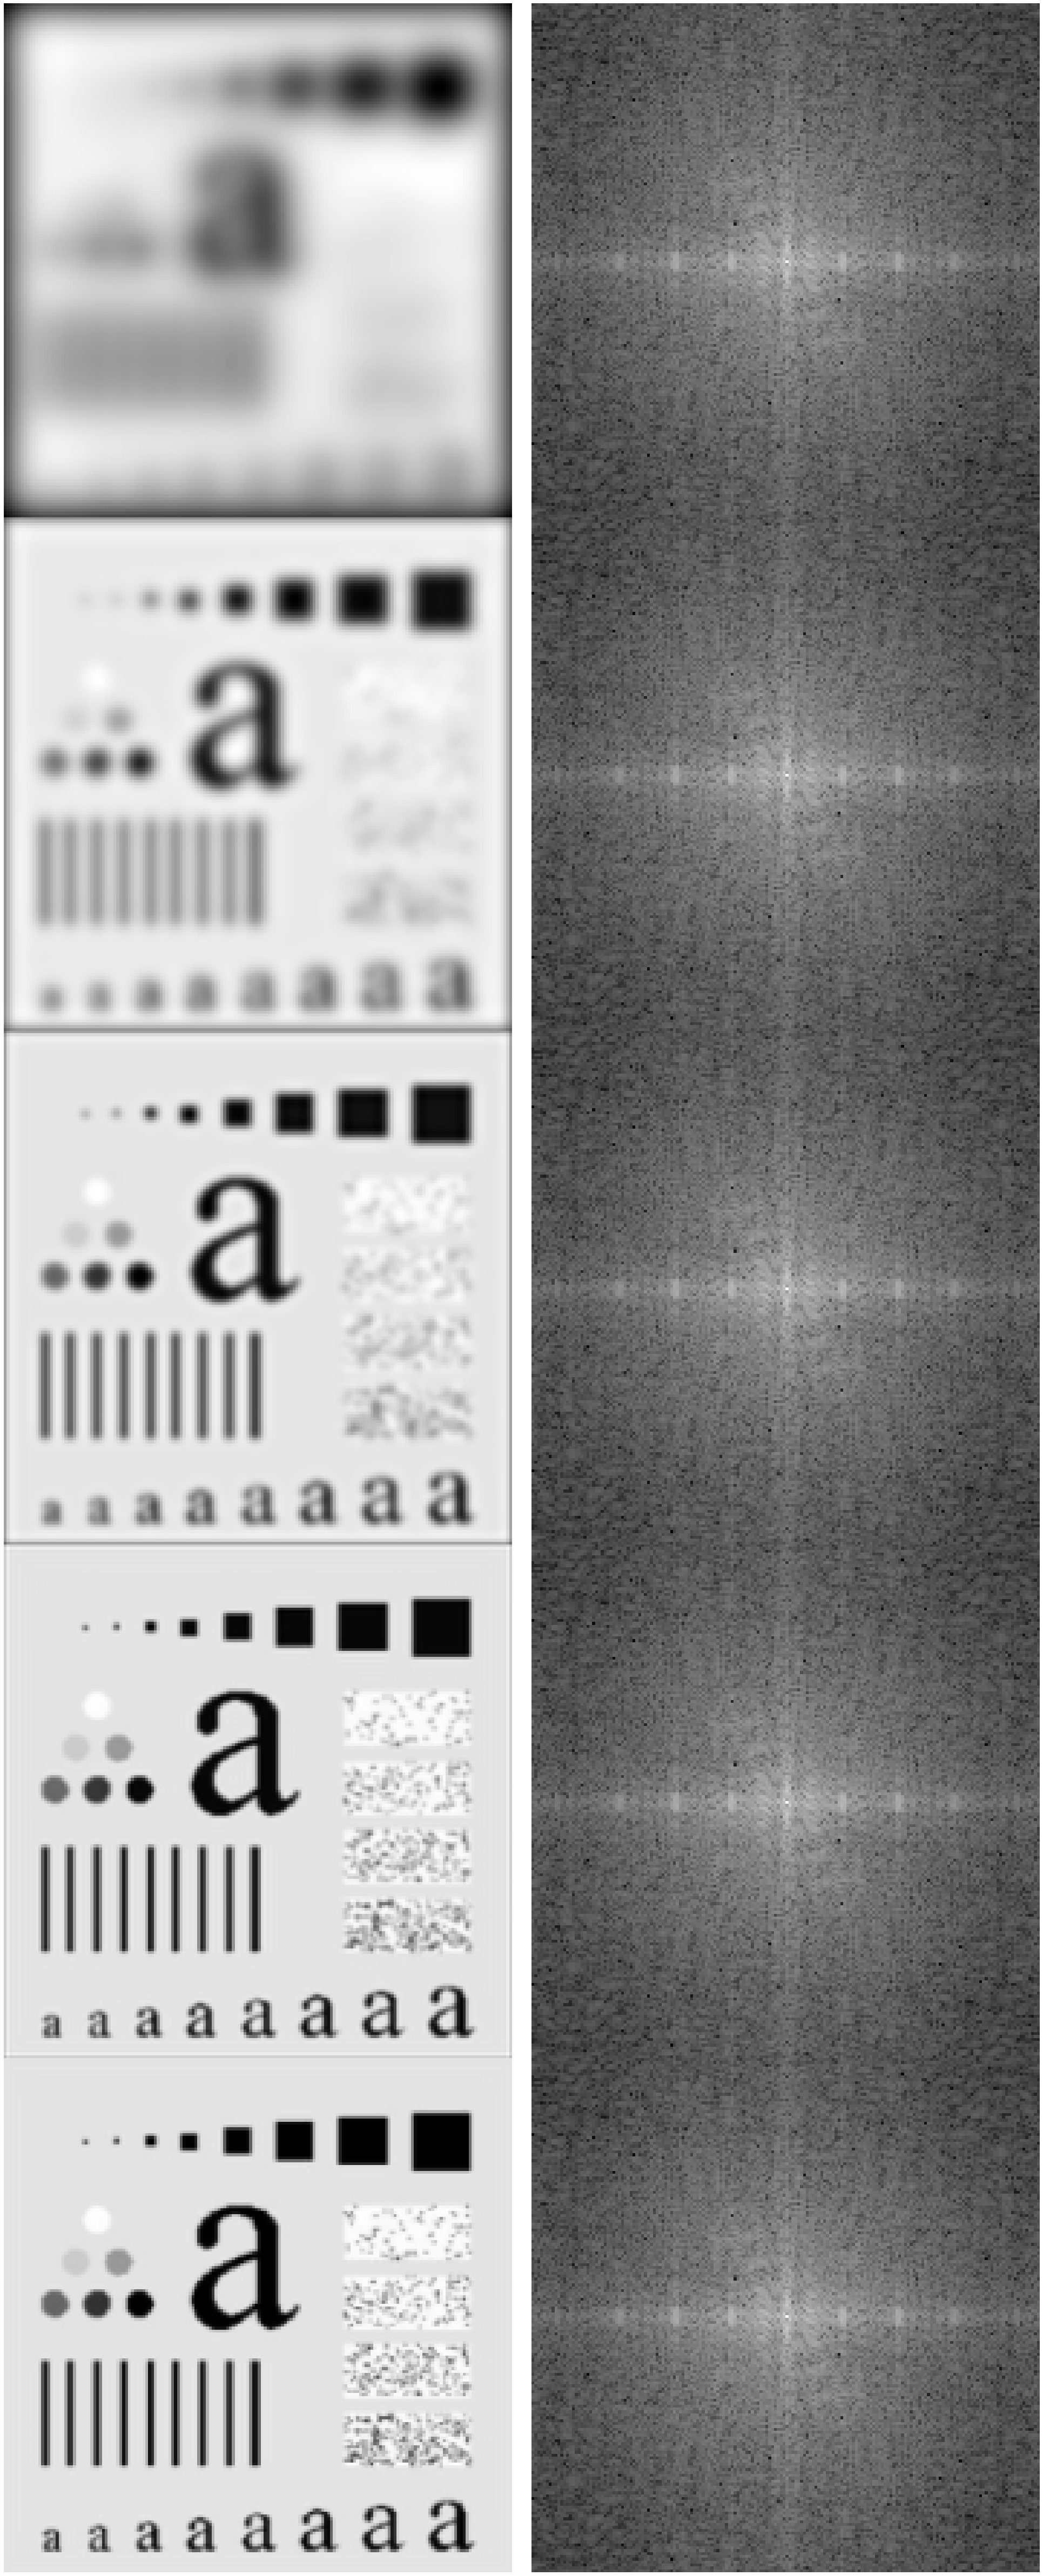

In [38]:
showImage([transform_by_Butterworth(gray, 10, 2), get_spectr(transform_by_Butterworth(gray, 10, 2)),
           transform_by_Butterworth(gray, 30, 2), get_spectr(transform_by_Butterworth(gray, 30, 2)),
           transform_by_Butterworth(gray, 60, 2), get_spectr(transform_by_Butterworth(gray, 60, 2)),
           transform_by_Butterworth(gray, 160, 2), get_spectr(transform_by_Butterworth(gray, 160, 2)),
           transform_by_Butterworth(gray, 460, 2), get_spectr(transform_by_Butterworth(gray, 160, 2))
          ])

In [4]:
#dft = cv2.dft(np.float32(gray), flags = cv2.CV_32FC1)

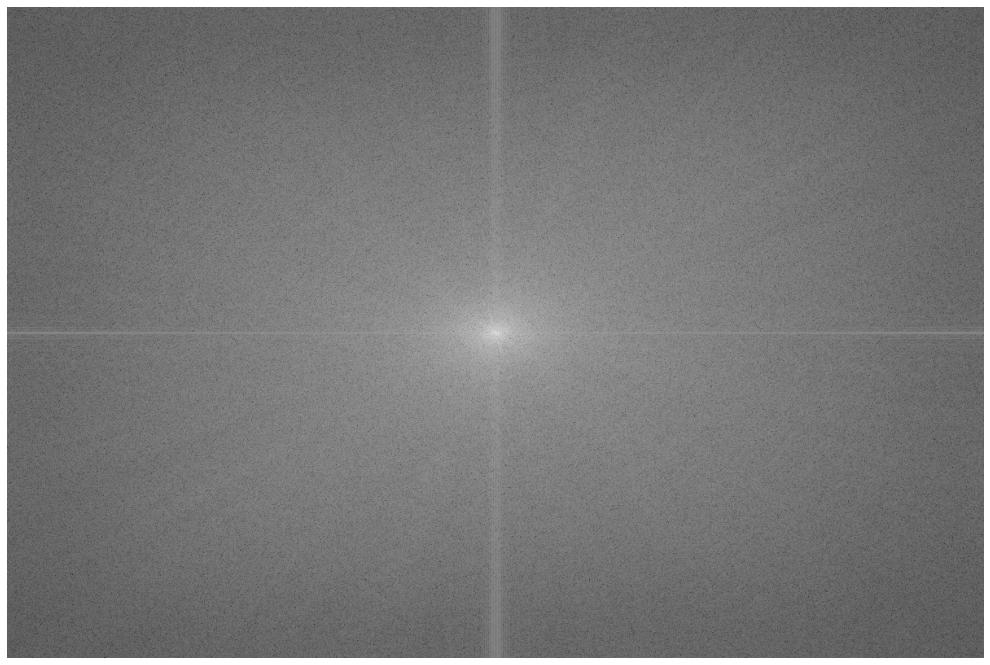

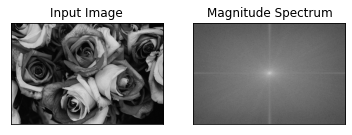

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('2.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

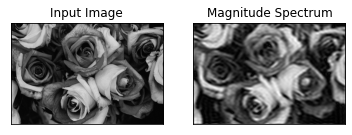

In [7]:
rows, cols = gray.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow-30):int(crow+30), int(ccol-30):int(ccol+30)] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()